<a href="https://colab.research.google.com/github/pvanik1/FastAI/blob/master/Practice_age_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Replicating Age Predictor web app : https://age-predictor.now.sh/

In [38]:
!curl -s https://course.fast.ai/setup/colab | bash
from fastai.vision import *
from fastai.callbacks.hooks import *

Updating fastai...
Done.


In [0]:
!wget "https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar"

In [0]:
!tar -xvf wiki_crop.tar

In [39]:
images = ImageList.from_folder(original_wd)
images[:5]

ImageList (5 items)
Image (3, 244, 245),Image (3, 371, 371),Image (3, 371, 371),Image (3, 120, 120),Image (3, 323, 323)
Path: /content

In [40]:
len(images)

54196

In [0]:
# USE AFTER RESETTING RUNTIME TO CLEAN DATA

# tooSmallCounter = 0
# for path, subdirs, files in os.walk(Path(os.getcwd())/'wiki_crop'):
#     for name in files:
#       file = pathlib.PurePath(path, name)
#       filesize = os.path.getsize(file)
#       if ((filesize < 1000) or (name[-3:]!="jpg")):
#         print(file)
#         print(filesize)
#         tooSmallCounter += 1
#         os.remove(file)
# print (tooSmallCounter)

In [0]:
# images = ImageList.from_folder(os.getcwd())
# images[:5]
# len(images)

In [0]:
def get_age_from_imageName(imageName):
  pat = r'([^/]+$)'
  pat = re.compile(pat)
  imageName = pat.search(str(imageName)).group(0)
  
  split = str(imageName)[:-4].split("_")
  year_photo = split[2]
  year_born = split[1].split("-")[0]
  age = int(year_photo) - int(year_born)
  return float(age)

# To check it works:
# for path, subdirs, files in os.walk(Path(os.getcwd())/'wiki_crop'):
#     for name in files:
#       print(get_age_from_imageName(name))

In [0]:
age_transforms = get_transforms(do_flip = True, flip_vert = False)

In [0]:
data = (images
       .split_by_rand_pct()
       .label_from_func(get_age_from_imageName, label_cls=FloatList)
       .transform(age_transforms, size = 228)
       .databunch())
data.normalize(imagenet_stats)

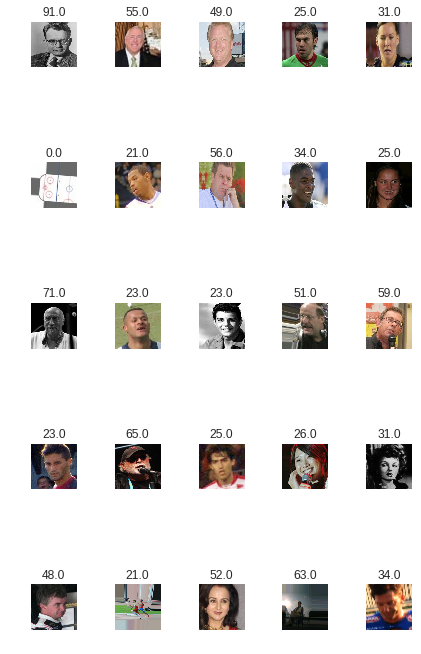

In [44]:
data.show_batch(rows=5, figsize=(6,10))

In [0]:
# IF METRICS FILE NEEDS TO BE UPDATED, SEE BELOW FIRST

learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [0]:
learn.save('stage-1')

In [0]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time


In [0]:
# this doesn't work even though it points to the same function in the library (tensor uncallable): learn.loss_func = FlattenedLoss
# “Alternative - Mean Absolute Error Loss”
# class L1LossFlat(nn.L1Loss):
# “Mean Absolute Error Loss”
#   def forward(self, input:Tensor, target:Tensor) -> Rank0Tensor:
#    return super().forward(input.view(-1), target.view(-1))
# print(learn.loss_func)

In [0]:
# Delete fastai/metrics.py and upload the corrected long() version
cd '/usr/local/lib/python3.6/dist-packages/fastai'

In [0]:
!rm -r '/usr/local/lib/python3.6/dist-packages/fastai/metrics.py'

In [0]:
from google.colab import files
files.upload()

In [35]:
cd '/content'

/content


In [36]:
pwd

'/content'

In [47]:
learn.data.label_list

LabelLists;

Train: LabelList (43357 items)
x: ImageList
Image (3, 228, 228),Image (3, 228, 228),Image (3, 228, 228),Image (3, 228, 228),Image (3, 228, 228)
y: FloatList
36.0,26.0,42.0,18.0,54.0
Path: /content;

Valid: LabelList (10839 items)
x: ImageList
Image (3, 228, 228),Image (3, 228, 228),Image (3, 228, 228),Image (3, 228, 228),Image (3, 228, 228)
y: FloatList
45.0,91.0,34.0,27.0,55.0
Path: /content;

Test: None